## Observations and Insights 

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset

merged_data = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')


# Display the data table for preview

merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.

len(merged_data['Mouse ID'].value_counts())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_finder = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()


#find duplicates in mouse id & timpoint, print that mouse ID

duplicate_finder

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicated_data = merged_data.loc[merged_data["Mouse ID"] == 'g989']

duplicated_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_df = merged_data[merged_data['Mouse ID'].isin(duplicate_finder) == False]

cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.

len(cleaned_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_group = cleaned_df.groupby(['Drug Regimen'])


# This method is the most straighforward, creating multiple series and putting them all together at the end.

tumor_mean = drug_group.mean()['Tumor Volume (mm3)']
tumor_median = drug_group.median()['Tumor Volume (mm3)']
tumor_variance = drug_group.var()['Tumor Volume (mm3)']
tumor_SD = drug_group.std()['Tumor Volume (mm3)']
tumor_SEM = drug_group.sem()['Tumor Volume (mm3)']

tumor_summary = pd.DataFrame({
    'Tumor Mean' : tumor_mean,
    'Tumor Median' : tumor_median,
    'Tumor Variance' : tumor_variance,
    'Tumor Standard Deviation' : tumor_SD, 
    'Tumor SEM' : tumor_SEM
})

tumor_summary

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_table = drug_group.agg({'Tumor Volume (mm3)': ["mean", "median", "var", "std", "sem"]})


# This method produces everything in a single groupby function

summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

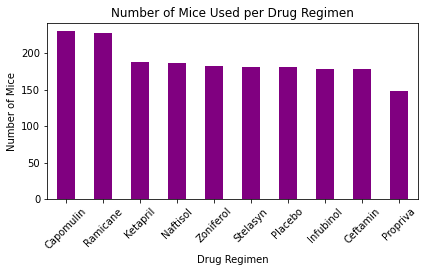

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

drug_counts = cleaned_df['Drug Regimen'].value_counts()

drug_counts.plot(kind='bar', width=.5, color='purple')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Number of Mice Used per Drug Regimen')

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

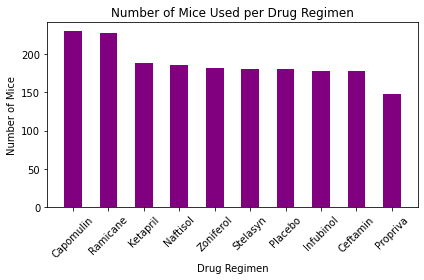

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

plt.bar(drug_counts.index.values, drug_counts.values, width=.5, color='purple')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Number of Mice Used per Drug Regimen')


tick_locations = [value for value in drug_counts]
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


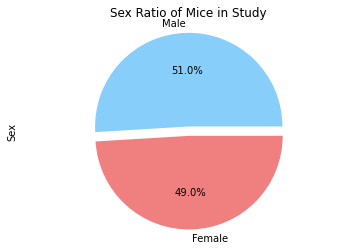

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_counts = cleaned_df['Sex'].value_counts()

sex_counts.plot(kind='pie', colors = ["lightskyblue","lightcoral"],explode = (0.1,0,),
        autopct="%1.1f%%")
plt.axis("equal")
plt.title("Sex Ratio of Mice in Study")
plt.show()

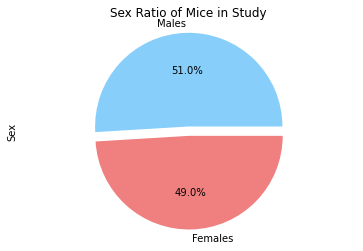

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#plt.pie(sex_counts.index.values)
# len(sex_counts['Male'].value_counts())
males = sex_counts['Male']
females = sex_counts['Female']
sexes = ['Males', 'Females']
sex_nums = [males, females]

plt.pie(sex_nums, labels=sexes,colors = ["lightskyblue","lightcoral"],explode = (0.1,0,),
        autopct="%1.1f%%")
plt.axis("equal")
plt.title("Sex Ratio of Mice in Study")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [146]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_tumor = cleaned_df.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max()
max_tumor.drop(["Ketapril", "Naftisol", "Placebo", "Propriva", "Stelasyn", "Zoniferol"], inplace=True)
max_tumor = max_tumor.reset_index('Mouse ID')
max_tumor.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

latest_data = max_tumor.merge(cleaned_df,on=['Mouse ID','Timepoint'],how="left")

latest_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
...,...,...,...,...,...,...,...,...
95,s508,45,30.276232,0,Ramicane,Male,1,17
96,u196,45,40.667713,3,Ramicane,Male,18,25
97,w678,5,43.166373,0,Ramicane,Female,5,24
98,y449,15,44.183451,0,Ramicane,Male,19,24


In [155]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = latest_data["Drug Regimen"].unique()

#["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]    
# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes

for drug in treatments:
    tumor_vol = latest_data['Tumor Volume (mm3)'].loc[latest_data['Drug Regimen'] == drug]
    tumor_volume_list.append(tumor_vol)
    
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile of {drug} is: {lowerq}.")
    print(f"The upper quartile of {drug} is: {upperq}.")
    print(f"The interquartile range of {drug} is: {iqr}.")
    print(f"The the median of {drug} is: {quartiles[0.5]}.")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = [volume for volume in tumor_vol if volume < lower_bound or volume > upper_bound]

    print(f"Values below {lower_bound} could be outliers for {drug}.")
    print(f"Values above {upper_bound} could be outliers for {drug}.\n ")
   
    if outliers == []:
        print(f"There are no potential {drug} outliers.\n---------------------------------\n\n\n")
    else:
        print(f"potential {drug} outliers are: {outliers}.\n---------------------------------\n\n\n")


quartiles = tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of Tumor Volume for all treatments is: {lowerq}.")
print(f"The upper quartile of Tumor Volume for all treatments is: {upperq}.")
print(f"The interquartile range of Tumor Volume for all treatments is: {iqr}.")
print(f"The the median of Tumor Volume for all treatments is: {quartiles[0.5]}.")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.\n ")


The lower quartile of Capomulin is: 32.37735684.
The upper quartile of Capomulin is: 40.1592203.
The interquartile range of Capomulin is: 7.781863460000004.
The the median of Capomulin is: 38.125164399999996.
Values below 20.70456164999999 could be outliers for Capomulin.
Values above 51.83201549 could be outliers for Capomulin.
 
There are no potential Capomulin outliers.
---------------------------------



The lower quartile of Ceftamin is: 48.72207785.
The upper quartile of Ceftamin is: 64.29983003.
The interquartile range of Ceftamin is: 15.577752179999997.
The the median of Ceftamin is: 59.85195552.
Values below 25.355449580000002 could be outliers for Ceftamin.
Values above 87.66645829999999 could be outliers for Ceftamin.
 
There are no potential Ceftamin outliers.
---------------------------------



The lower quartile of Infubinol is: 54.04860769.
The upper quartile of Infubinol is: 65.52574285.
The interquartile range of Infubinol is: 11.477135160000003.
The the median of In

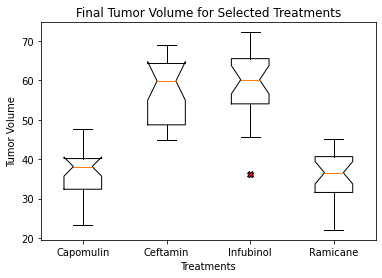

In [156]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

final_tumors = latest_data['Tumor Volume (mm3)']
red_x = dict(markerfacecolor='r', marker='X')
plt.boxplot(tumor_volume_list, labels=treatments, flierprops=red_x, notch=True)
plt.title('Final Tumor Volume for Selected Treatments')
plt.xlabel('Treatments')
plt.ylabel('Tumor Volume')
plt.show()

## Line and Scatter Plots

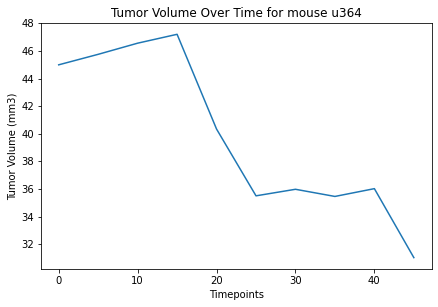

In [163]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
id_index = merged_data.set_index("Mouse ID")
 
mouse_id = 'u364'
individual_time = id_index.loc[mouse_id,["Timepoint"]]
individual_volume = id_index.loc[mouse_id,["Tumor Volume (mm3)"]]

plt.plot(individual_time, individual_volume, label="Tumor Volume Over Time")
plt.tight_layout()
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume Over Time for mouse {mouse_id}")
plt.show()

In [150]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

drug_index = cleaned_df.set_index("Drug Regimen")
just_capomulin = drug_index.loc['Capomulin']
avg_tumor_vol = just_capomulin.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
avg_tumor_vol
mouse_weight = just_capomulin.groupby(["Mouse ID"])["Weight (g)"].mean()


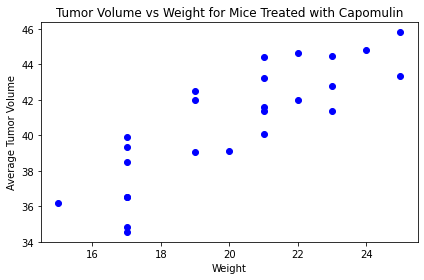

In [166]:
plt.scatter(mouse_weight, avg_tumor_vol, marker='o', facecolors='blue')
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")
plt.title("Tumor Volume vs Weight for Mice Treated with Capomulin")
plt.tight_layout()
plt.show()

## Correlation and Regression

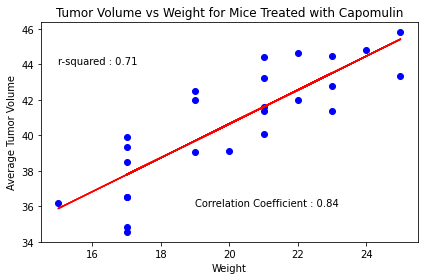

In [170]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight,avg_tumor_vol)
regress_values = mouse_weight * slope + intercept


plt.scatter(mouse_weight, avg_tumor_vol, marker='o', facecolors='blue')
plt.plot(mouse_weight,regress_values,"r-")

rsquared = f"r-squared : {(round(rvalue**2,2))}"
cc = f"Correlation Coefficient : {round(st.pearsonr(mouse_weight,avg_tumor_vol)[0],2)}"
plt.annotate(rsquared, (15, 44))
plt.annotate(cc, (19, 36))
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")
plt.title("Tumor Volume vs Weight for Mice Treated with Capomulin")
plt.tight_layout()
plt.show()
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# prolly don't need pvalue and stderr
